In [ ]:
# Mount Google Colab drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/IndoorObjectDetection/

/content/drive/MyDrive/IndoorObjectDetection


The **YOLO** architecture has been chosen for the object detection algorithm. The `keras-YOLOv3-model-set` implementation is utilized (source: [Github](https://github.com/david8862/keras-YOLOv3-model-set#tensorflow-model-convert)).

Clone the repository and change directory to `keras-YOLOv3-model-set`.

In [ ]:
!git clone https://github.com/david8862/keras-YOLOv3-model-set

In [ ]:
%cd ./keras-YOLOv3-model-set

/content/drive/MyDrive/IndoorObjectDetection/keras-YOLOv3-model-set


Install package dependencies. Notice some installations may require to restart the runtime. Run cells sequentially and restart runtime as necessary.

In [ ]:
!apt install python3-opencv imagemagick numpy==1.21.0 scikit-learn==1.0.0 folium==0.2.1 imgaug==0.2.5 h5py==2.10.0
!pip install Cython
!pip install -r requirements.txt

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package numpy=
E: Unable to locate package scikit-learn=
E: Unable to locate package folium=
E: Unable to locate package imgaug=
E: Unable to locate package h5py=
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 88.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.2/28.2 MB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.2/34.2 MB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 588.3/588.3 MB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 KB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.7/172.7 KB 22.9 MB/s eta 0:00:

TensorFlow version 2.4 is required for a successful training, model conversion and inference. Use this version for all steps in the pipeline as some steps may raise errors or exceptions with a different version.

In [ ]:
!pip install tensorflow==2.4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 394.8/394.8 MB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 46.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 KB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 54.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.0/462.0 KB 40.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.9/14.9 MB 39.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4849 sha256=53292f02a9d85156cada09b6f5f8c3e31bec6c7f560c9e13b3d2a87ef05a1ce4
  Stored in directory: /root/.cache/pip/wheels/a0/16/9c/5473df82468f958445479c59e784896fa24f4a5fc024b0f501
  Created wheel for wrapt: filename=wrapt-1.12.1-cp38-cp38-linux_x86_64.whl

Check TF v2.4 is imported correctly.

In [ ]:
import tensorflow
print(tensorflow.__version__) 

2.4.0


In [ ]:
!pip install --upgrade tensorflow-model-optimization

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.9/238.9 KB 12.8 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-model-optimization
    Found existing installation: tensorflow-model-optimization 0.5.0
    Uninstalling tensorflow-model-optimization-0.5.0:
      Successfully uninstalled tensorflow-model-optimization-0.5.0


In [ ]:
!pip install mnn==1.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 5.2 MB/s eta 0:00:00
  Attempting uninstall: mnn
    Found existing installation: MNN 2.3.0
    Uninstalling MNN-2.3.0:
      Successfully uninstalled MNN-2.3.0


In [ ]:
!pip install keras_applications

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# imports
import cv2
import matplotlib.pyplot as plt
import random
import os
import csv
import xml.etree.ElementTree as ET
import math
from PIL import Image
import copy
import time
import tensorflow as tf
from tensorflow.keras.models import load_model
import tensorflow.keras.backend as K
from tensorflow.keras.layers import ReLU, Activation, Multiply

Since transfer learning is considered for training the NN, the weights of the pre-trained used model are required. Commands to download the weights for all available YOLO architectures withing `keras-YOLOv3-model-set` packpage are shown in this section. The model architecture of interest for this project is `yolo3` and `yolo3-tiny`. Remaining commands are commented out.

<a name="3"></a>
# 3. Dataset and annotation visualization

The Indoor Object Detection dataset provides the annotations in VOC format. YOLO architecture requires an annotation file input which follows the format:

```
image1_path x1_min,y1_min,x1_max,y1_max,class_id1 x2_min,y2_min,x2_max,y2_max,class_id2 ...
image2_path x1_min,y1_min,x1_max,y1_max,class_id1 x2_min,y2_min,x2_max,y2_max,class_id2 ...
...
```

In order to create the annotations file in the required format, the annotations must be process with the following function:

In [ ]:
def VOCtoCSV(dataset_dir, annotation_dir):

  # open a CSV file to write the data to
  with open(os.path.join(dataset_dir, 'annotations.txt'), 'w', newline='') as f:
      writer = csv.writer(f, delimiter=" ", escapechar=',')


      labels = []

      # iterate through the subfolders in the dataset directory
      for subfolder in os.listdir(dataset_dir):
          if subfolder.startswith('sequence_'):
              # Extract the sequence number from the subfolder name
              sequence_num = subfolder.split('_')[1]
              # Load the corresponding XML file from the annotation folder
              xml_file = os.path.join(annotation_dir, 'annotation_s{}.xml'.format(sequence_num))
              tree = ET.parse(xml_file)
              root = tree.getroot()
              for image in root.findall('images/image'):
                image_filename = image.attrib.get('file')
                # Find all the box elements in the XML file
                boxes = []
                for box in image.findall(f'box'):
                    # Extract the class label
                    class_label = box.find('label').text
                    if class_label not in labels:
                      labels.append(class_label)
                    
                    # Extract the bounding box coordinates
                    xmin = box.attrib.get('left')
                    ymin = box.attrib.get('top')
                    xmax = int(xmin) + int(box.attrib.get('width'))
                    ymax = int(ymin) + int(box.attrib.get('height'))
                    boxes.append(','.join([str(xmin), str(ymin), str(xmax), str(ymax), str(labels.index(class_label))]))

                f.write(' '.join([dataset_dir+'/'+subfolder+'/'+image_filename, str(' '.join(boxes))]) + '\n')
      
      with open(os.path.join(dataset_dir, 'classes.txt'), 'w') as l:
        for label in labels:
          l.write(label+'\n')

In [ ]:
# path to dataset directory and the annotation folder
dataset_dir = '/content/drive/MyDrive/IndoorObjectDetection/data'
annotation_dir = '/content/drive/MyDrive/IndoorObjectDetection/data/annotation'

VOCtoCSV(dataset_dir, annotation_dir)

In order to visualize the dataset images and their annotations (i.e. bounding boxes), the dataset visualization tool from `keras-YOLOv3-model-set` package may be used. Notice that this tool should open a window to show the image. This is not possible when working with Google Colab.

Alternatively, the following snippet may be used when working with Google Colab. The code loads the image given from the `image_path` and display it with the annotation boxes provided with the `boxes_list`.

In [ ]:
def plot_show_image_with_boxes(image_path, boxes_list):

  # read image
  image = cv2.imread(image_path)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

  # plot boxes
  for i in range(len(boxes_list)):
    xmin, ymin, xmax, ymax, classid = boxes_list[i].split(',')
    image = cv2.rectangle(image,(int(xmin),int(ymin)),(int(xmax),int(ymax)),(255,0,0), 5)
  
  plt.imshow(image)
  plt.show()

This is an example of an image ploted with the ground truth annotations.

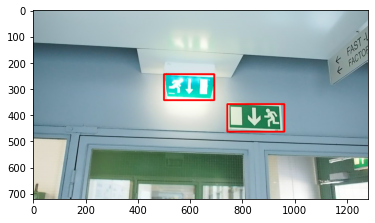

In [ ]:
IMAGE_PATH = '/content/drive/MyDrive/IndoorObjectDetection/data/sequence_1/frame_s1_1.jpg'
ANNOTATIONS_PATH = '/content/drive/MyDrive/IndoorObjectDetection/data/annotations.txt'

with open(ANNOTATIONS_PATH) as f:
  lines = f.readlines()
 
  for line in lines:

    line = line.split(' ')

    if line[0] == IMAGE_PATH:
      plot_show_image_with_boxes(image_path=line[0], 
                                 boxes_list=line[1:])

In [ ]:
class_counts = {}

with open('/content/drive/MyDrive/IndoorObjectDetection/data/annotations.txt', 'r') as f:
    reader = csv.reader(f, delimiter=' ')
    for row in reader:
        for box in row[1:]:
            class_id = box.split(',')[-1]
            if class_id in class_counts:
                class_counts[class_id] += 1
            else:
                class_counts[class_id] = 1

print(class_counts)


{'0': 545, '1': 1684, '2': 1662, '3': 280, '4': 228, '5': 81, '6': 115, '': 6}


In [ ]:
def train_valid_split(file_path, output_path, split_percentage=0.8, shuffle_flag=True):

  with open(file_path, 'r') as f:
      lines = f.readlines()
  if shuffle_flag:
      random.shuffle(lines)
  split_index = int(len(lines) * split_percentage)
  train_lines = lines[:split_index]
  valid_lines = lines[split_index:]
  with open(f'{output_path}/train.txt', 'w') as f:
      f.writelines(train_lines)
  with open(f'{output_path}/valid.txt', 'w') as f:
      f.writelines(valid_lines)


In [ ]:
train_valid_split('/content/drive/MyDrive/IndoorObjectDetection/data/annotations.txt',
                  '/content/drive/MyDrive/IndoorObjectDetection/data',
                  0.8, True)

In [ ]:
%cd /content/drive/MyDrive/IndoorObjectDetection/keras-YOLOv3-model-set

/content/drive/MyDrive/IndoorObjectDetection/keras-YOLOv3-model-set


In [ ]:
!apt install --allow-change-held-packages libcudnn8=8.1.0.77-1+cuda11.2

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following packages will be REMOVED:
  libcudnn8-dev
The following held packages will be changed:
  libcudnn8
The following packages will be DOWNGRADED:
  libcudnn8
0 upgraded, 0 newly installed, 1 downgraded, 1 to remove and 21 not upgraded.
Need to get 430 MB of archives.
After this operation, 1,392 MB disk space will be freed.
Get:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  libcudnn8 8.1.0.77-1+cuda11.2 [430 MB]
Fetched 430 MB in 7s (63.9 MB/s)
(Reading database ... 129504 files and directories currently installed.)
Removing libcudnn8-dev (8.1.1.33-1+cuda11.2) ...
update-alternatives: removing manually selected alternative - switching libcudnn to auto mode
dpkg: warning: downgrading libcudnn8 from 8.1.1.33-1+cuda11.2 to 8.1.0.77-1+cuda11.2
(Reading database ... 129481 files and directories currently installed.)
Preparing to unpack .../libcudnn8_8.1.0.7

Change directory to `keras-YOLOv3-model-set` and run `train.py` script.

In [ ]:
%cd /content/drive/MyDrive/IndoorObjectDetection/keras-YOLOv3-model-set

!python train.py --model_type=yolo3_mobilenet_lite \
--anchors_path=configs/yolo3_anchors.txt \
--annotation_file=/content/drive/MyDrive/IndoorObjectDetection/data/train.txt \
--classes_path=/content/drive/MyDrive/IndoorObjectDetection/data/classes.txt \
--eval_online \
--save_eval_checkpoint

/content/drive/MyDrive/IndoorObjectDetection/keras-YOLOv3-model-set
2023-01-20 07:32:30.483683: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd
ImportError: numpy.core.multiarray failed to import

The above exception was the direct cause of the following exception:

SystemError: <built-in function __import__> returned a result with an error set
2023-01-20 07:33:12.963462: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-01-20 07:33:12.966056: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2023-01-20 07:33:13.585334: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero

Copy final model to `output_models` directory for later use.

In [ ]:
!mkdir /content/drive/MyDrive/IndoorObjectDetection/output_models/yolo3_mobilenet_lite

mkdir: cannot create directory ‘/content/drive/MyDrive/IndoorObjectDetection/output_models/yolo3_mobilenet_lite’: File exists


In [ ]:
!cp /content/drive/MyDrive/IndoorObjectDetection/keras-YOLOv3-model-set/logs/000/ep020-loss7.758-val_loss7.674-mAP62.063.h5 \
/content/drive/MyDrive/IndoorObjectDetection/output_models/yolo3_mobilenet_lite/trained_final.h5

cp: cannot stat '/content/drive/MyDrive/IndoorObjectDetection/keras-YOLOv3-model-set/logs/000//content/drive/MyDrive/IndoorObjectDetection/keras-YOLOv3-model-set/logs/000/ep020-loss7.758-val_loss7.674-mAP62.063.h5': No such file or directory


After training, the model needs to be set to inference mode in order to be used for prediction. `yolo.py` script is run to perform the inference mode setting. Arguments are the model type, the trained model path, the anchors for the bounding boxes, the class file, the model's input shape and whether the inference model should be stored and its output location.

Change directory to `keras-YOLOv3-model-set` and run `yolo.py`.

In [ ]:
%cd /content/drive/MyDrive/IndoorObjectDetection/keras-YOLOv3-model-set

/content/drive/MyDrive/IndoorObjectDetection/keras-YOLOv3-model-set


In [ ]:
!python yolo.py \
--model_type=yolo3_mobilenet_lite \
--weights_path=/content/drive/MyDrive/IndoorObjectDetection/output_models/yolo3_mobilenet_lite/trained_final.h5 \
--anchors_path=configs/yolo3_anchors.txt \
--classes_path=/content/drive/MyDrive/IndoorObjectDetection/data/classes.txt \
--model_input_shape=416x416 \
--dump_model \
--output_model_file=/content/drive/MyDrive/IndoorObjectDetection/output_models/yolo3_mobilenet_lite/yolo3_mobilenet_lite.h5

2023-01-21 10:14:18.332024: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2023-01-21 10:15:13.617495: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-01-21 10:15:13.620004: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2023-01-21 10:15:14.269501: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-21 10:15:14.270217: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.75GiB deviceMemoryBandwidth: 298.08GiB/s
2023-01-21 10:15:14.270285: I tensorflow/stream_executor/platform/default/dso_loade

<a name="6"></a>
 Evaluation process

Change directory to `keras-YOLOv3-model-set` and tun `eval.py` script.

In [ ]:
!pwd

/content/drive/MyDrive/IndoorObjectDetection/keras-YOLOv3-model-set


In [ ]:
!python eval.py \
--model_path=/content/drive/MyDrive/IndoorObjectDetection/output_models/yolo3_mobilenet_lite/yolo3_mobilenet_lite.h5 \
--anchors_path=configs/yolo3_anchors.txt \
--classes_path=/content/drive/MyDrive/IndoorObjectDetection/data/classes.txt \
--model_input_shape=416x416 \
--eval_type=VOC \
--iou_threshold=0.5 \
--conf_threshold=0.3 \
--annotation_file=/content/drive/MyDrive/IndoorObjectDetection/data/valid.txt \
--save_result

2023-01-21 10:20:34.405995: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd
ImportError: numpy.core.multiarray failed to import

The above exception was the direct cause of the following exception:

SystemError: <built-in function __import__> returned a result with an error set
2023-01-21 10:20:37.577955: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-01-21 10:20:37.579381: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2023-01-21 10:20:38.328358: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-21 10:20:38.329420: I tensorflow/core/common_runtime/gpu/gp

The following helper functions are taken from the `keras-YOLO3-model-set` package. They are used for inference with TF and TFLite models.

In [ ]:
def load_eval_model(model_path):
    # support of tflite model
    if model_path.endswith('.tflite'):
        from tensorflow.lite.python import interpreter as interpreter_wrapper
        model = interpreter_wrapper.Interpreter(model_path=model_path)
        model.allocate_tensors()
        model_format = 'TFLITE'

    # normal keras h5 model
    elif model_path.endswith('.h5'):
        custom_object_dict = get_custom_objects()

        model = load_model(model_path, compile=False, custom_objects=custom_object_dict)
        model_format = 'H5'
        K.set_learning_phase(0)
    else:
        raise ValueError('invalid model file')

    return model, model_format

def get_custom_objects():
    '''
    form up a custom_objects dict so that the customized
    layer/function call could be correctly parsed when keras
    .h5 model is loading or converting
    '''
    custom_objects_dict = {
        'tf': tf,
        'swish': swish,
        'hard_sigmoid': hard_sigmoid,
        'hard_swish': hard_swish,
        'mish': mish
    }

    return custom_objects_dict

def swish(x):
    """Swish activation function.
    # Arguments
        x: Input tensor.
    # Returns
        The Swish activation: `x * sigmoid(x)`.
    # References
        [Searching for Activation Functions](https://arxiv.org/abs/1710.05941)
    """
    if K.backend() == 'tensorflow':
        try:
            # The native TF implementation has a more
            # memory-efficient gradient implementation
            return K.tf.nn.swish(x)
        except AttributeError:
            pass

    return x * K.sigmoid(x)

def hard_sigmoid(x):
    return ReLU(6.)(x + 3.) * (1. / 6.)

def hard_swish(x):
    return Multiply()([Activation(hard_sigmoid)(x), x])

def mish(x):
    return x * K.tanh(K.softplus(x))


In [ ]:
def yolo_predict_tflite(interpreter, image, anchors, num_classes, conf_threshold):#, elim_grid_sense, v5_decode):
    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()

    #print("input/output details:")
    #print(input_details)
    #print(output_details)

    # check the type of the input tensor
    #if input_details[0]['dtype'] == np.float32:
        #floating_model = True

    height = input_details[0]['shape'][1]
    width = input_details[0]['shape'][2]
    model_input_shape = (height, width)

    image_data = preprocess_image(image, model_input_shape)
    #origin image shape, in (height, width) format
    image_shape = image.size[::-1]
    #print(f"image shape: {image_shape}")

    interpreter.set_tensor(input_details[0]['index'], image_data)
    start = time.time()
    interpreter.invoke()
    print('Time for inference:',time.time()-start)

    prediction = []
    for output_detail in output_details:
        output_data = interpreter.get_tensor(output_detail['index'])
        prediction.append(output_data)
        #print(f"output data: {output_data}")

    start = time.time()
    pred_boxes, pred_classes, pred_scores = yolo3_postprocess_np(prediction, image_shape, anchors, num_classes, model_input_shape, max_boxes=100, confidence=conf_threshold)#, elim_grid_sense=elim_grid_sense)
    print('Time to postprocess prediction',time.time()-start)

    return pred_boxes, pred_classes, pred_scores

`scipy.special.expit` (sigmoid function) is replace with a `numpy` implementation:

In [ ]:
import numpy as np

def expit(x):
  
    z = np.exp(-x)
    sig = 1 / (1 + z)

    return sig

In [ ]:
def yolo_predict_keras(model, image, anchors, num_classes, model_input_shape, conf_threshold, elim_grid_sense):#, v5_decode):
    image_data = preprocess_image(image, model_input_shape)
    #origin image shape, in (height, width) format
    image_shape = image.size[::-1]

    prediction = model.predict([image_data])
    if type(prediction) is not list:
        prediction = [prediction]

#    if len(anchors) == 5:
#        # YOLOv2 use 5 anchors
#        pred_boxes, pred_classes, pred_scores = yolo2_postprocess_np(prediction[0], image_shape, anchors, num_classes, model_input_shape, max_boxes=100, confidence=conf_threshold, elim_grid_sense=elim_grid_sense)
#    else:
#        if v5_decode:
#            pred_boxes, pred_classes, pred_scores = yolo5_postprocess_np(prediction, image_shape, anchors, num_classes, model_input_shape, max_boxes=100, confidence=conf_threshold, elim_grid_sense=True) #enable "elim_grid_sense" by default
#        else:
#            pred_boxes, pred_classes, pred_scores = yolo3_postprocess_np(prediction, image_shape, anchors, num_classes, model_input_shape, max_boxes=100, confidence=conf_threshold, elim_grid_sense=elim_grid_sense)
    pred_boxes, pred_classes, pred_scores = yolo3_postprocess_np(prediction, image_shape, anchors, num_classes, model_input_shape, max_boxes=100, confidence=conf_threshold, elim_grid_sense=elim_grid_sense)

    return pred_boxes, pred_classes, pred_scores

The following function is used to display a given image with its corresponding ground truth annotations and the predicted detections side by side.

In [ ]:
def plot_images(image_path, annotation_file):
    """
    Plots the ground truth and prediction for a given image.
    
    Parameters:
    - image_path (str): path to the image
    - annotation_file (str): path to the annotation file
    
    Returns:
    - None
    """
    # Read the annotation file
    with open(annotation_file, 'r') as f:
        annotations = f.readlines()
    
    # Check if the image is in the annotations file
    for line in annotations:
        if image_path in line:
            # Extract the ground truth boxes
            ground_truth_boxes = line.split(' ')[1:]
            break
    else:
        print(f"{image_path} not found in {annotation_file}.")
        return
    
    # Read the image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Plot the ground truth boxes on the image
    for box in ground_truth_boxes:
        xmin, ymin, xmax, ymax = list(map(int, box.split(',')))[:-1]
        cv2.rectangle(image, (xmin, ymin), (xmax, ymax), (255, 0, 0), 2)
    
    # Get the prediction for the image
    img = Image.open(image_path)
    anchors = get_anchors('/content/drive/MyDrive/IndoorObjectDetection/keras-YOLOv3-model-set/configs/yolo3_anchors.txt')
    num_classes = 7
    conf_threshold = 0.4
    model_input_shape = (416,416)
    pred_boxes, pred_classes, pred_scores = yolo_predict_keras(model, img, anchors, num_classes, model_input_shape, conf_threshold, elim_grid_sense=False)

    # Plot the ground truth boxes on the image
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    for box in pred_boxes:
      xmin, ymin, xmax, ymax = box
      cv2.rectangle(img, (xmin, ymin), (xmax, ymax), (255, 0, 0), 2)
    
    # Plot the images
    fig, ax = plt.subplots(1, 2, figsize=(15, 10))
    ax[0].imshow(image)
    ax[0].set_title(f"Ground truth ({os.path.basename(image_path)})")
    ax[1].imshow(img)
    ax[1].set_title(f"Prediction ({os.path.basename(image_path)})")
    plt.show()


As a visual evaluation, a series of images from the validation set are displayed with the ground truth and predicted detections side by side.

In [ ]:
!python eval.py \
--model_path=/content/drive/MyDrive/IndoorObjectDetection/output_models/yolo3_mobilenet_lite/yolo3_mobilenet_lite.h5 \
--anchors_path=configs/yolo3_anchors.txt \
--classes_path=/content/drive/MyDrive/IndoorObjectDetection/data/classes.txt \
--model_input_shape=416x416 \
--eval_type=VOC \
--iou_threshold=0.5 \
--conf_threshold=0.3 \
--annotation_file=/content/drive/MyDrive/IndoorObjectDetection/data/valid.txt \
--save_result

2023-01-24 18:37:45.466166: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd
ImportError: numpy.core.multiarray failed to import

The above exception was the direct cause of the following exception:

SystemError: <built-in function __import__> returned a result with an error set
2023-01-24 18:37:57.880096: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-01-24 18:37:57.881181: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2023-01-24 18:37:57.891916: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-24 18:37:57.892138: I tensorflow/core/common_runtime/gpu/gp